# Smoke Test Notebook

This notebook runs some simple tests to ensure the Python environment you have set up for the summer school is working correctly.

Please run it a few days before you arrive and check that it ran correctly and without errors or warnings.

If you are struggling to get it to run correctly, please submit an issue at https://github.com/hodgestar/qutip-asqsqis-2022/issues/new and we'll attempt to help you debug your environment by offering advice on what to try next.

Each section below describes briefly what is being tested and what output is expected.

Don't worry if you don't understand what the code is doing -- we'll cover all of it and more during the summer school.

Good luck!

## Import matplotlib, numpy and qutip

These cells import the software packages we'll use during the school. The cells should run without errors or warnings and not produce any output.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import numpy as np

In [3]:
import qutip

## Create a quantum gate and display it

The cell below creates a Hadamard gate and displays it. The output should contan the line:

`Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True`

followed by the matrix:

$$
\begin{pmatrix}
0.707 & 0.707 \\
0.707 & −0.707
\end{pmatrix}
$$

In [4]:
H = qutip.qip.operations.hadamard_transform(1)
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

## Plot a Bloch sphere

The cell below draws the Bloch sphere, the space of all qubit states, and plots two state vectors on it.

The output should show a sphere with the labels $ \vert 0 \rangle $ at the north pole, $ \vert 1 \rangle $ at the south pole, $ x $ near the equator in the front left, and $ y $ on the equator near the right.

There should be a green arrow from the centre of the sphere to the north pole, and a mustard arrow from the centre of the sphere to the south pole.

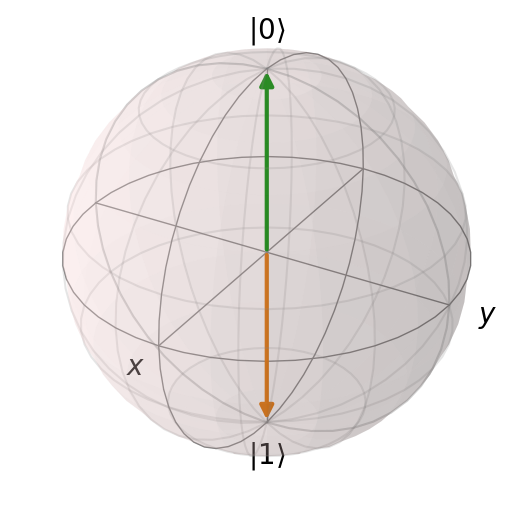

In [5]:
bloch = qutip.Bloch()
bloch.add_states(qutip.ket("0"))
bloch.add_states(qutip.ket("1"))
bloch.show()

## Solve Schrödinger's Equation

In the cells below we solve Schrödinger's equation for a single qubit evolving by rotating around the z-axis of the Bloch sphere.

In the first cell there should be no output and no errors. We'll plot the results in the second and third cells.

In [6]:
H = qutip.sigmaz()
psi0 = 2 * qutip.ket("0") + 1j * qutip.ket("1")
psi0 = psi0.unit()
times = np.linspace(0, np.pi, 100)
e_ops = [qutip.ket("0").proj(), qutip.ket("1").proj()]

result = qutip.sesolve(H, psi0, times, e_ops=e_ops, options=qutip.Options(store_states=True))

In the cell below we plot the probabilities of being in the state $ \vert 0 \rangle $ and $ \vert 1 \rangle $ over time. Both probabilities are constant, so there should be a horizontal blue line at $ 0.8 $ and a horizontal mustard line at $ 0.2 $.

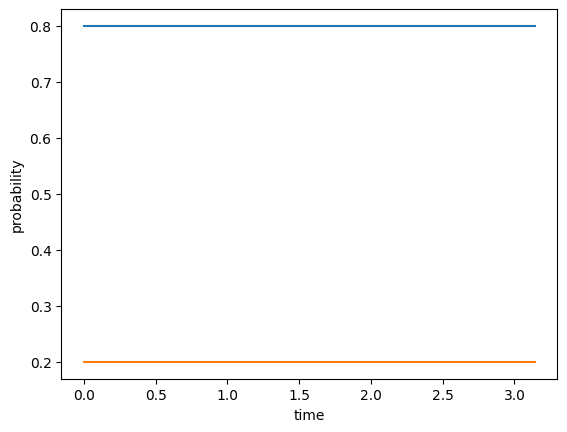

In [7]:
_, ax = plt.subplots(1, 1)
ax.set(xlabel="time", ylabel="probability")
ax.plot(times, result.expect[0], label="|0>")
ax.plot(times, result.expect[1], label="|1>")
None;

In the cell below we plot the evolution of the states on the Bloch sphere. There should be a cone of upward facing arrows, symmetric around the z-axis, varying in colour from light to dark turquoise.

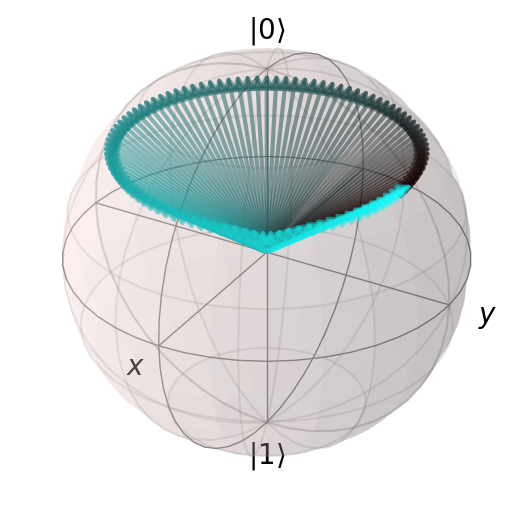

In [8]:
bloch = qutip.Bloch()
bloch.vector_color = [(0.1, x, x) for x in np.linspace(0, 1, len(times))]
bloch.add_states(result.states, alpha=0.5)
bloch.show()

## Display a quantum circuit

In the cell below we create a simple quantum circuit. It should run without errors and display two horizontal lines with an `H` in a box on the lower line, and a ⊕ on the top line that is connected to a dot on the lower line.

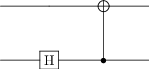

In [9]:
qc = qutip.qip.circuit.QubitCircuit(N=2)
qc.add_gate("SNOT", targets=0)
qc.add_gate("CNOT", controls=0, targets=1)
qc

## System Information

The cell below prints out information about your QuTiP installation that may be useful when debugging issues if any of the tests above failed.

If no errors occurred, you're good to go!

In [10]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman and Simon Cross.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.0
Numpy Version:      1.23.2
Scipy Version:      1.9.0
Cython Version:     0.29.32
Matplotlib Version: 3.5.3
Python Version:     3.10.4
Number of CPUs:     8
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /home/simon/venvs/py3/qutip-asqsqis-2022/lib/python3.10/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily gene